<a href="https://colab.research.google.com/github/SilviaMastracci/AIA/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT 1 - Applications of Artificial Intelligence**

Work carried out by:


*   **Beatriz Guerra  103813**
*   **Silvia Mastracci  123177**



# First study with 1 hidden layer, 32 neurons and Adam optimizer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout

In [ ]:
data = pd.read_excel('P1_AIA.xlsx')

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.797509,-1.669388,0.691655,3.208019,5.798788,8.407532,11.022395,11.682919,12.471617,13.492483,10.842158,7.581519,4.715426
1,-1.669388,0.691655,3.208019,5.798788,8.407532,11.022395,11.682919,12.471617,13.492483,10.842158,7.581519,4.715426,2.186202
2,0.691655,3.208019,5.798788,8.407532,11.022395,11.682919,12.471617,13.492483,10.842158,7.581519,4.715426,2.186202,-0.117162
3,3.208019,5.798788,8.407532,11.022395,11.682919,12.471617,13.492483,10.842158,7.581519,4.715426,2.186202,-0.117162,-2.336292
4,5.798788,8.407532,11.022395,11.682919,12.471617,13.492483,10.842158,7.581519,4.715426,2.186202,-0.117162,-2.336292,-2.612963


In [ ]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
X = data.iloc[:, :-1].values   # contains the features
y = data.iloc[:, -1].values    # the values to predict

In [ ]:
X_train_ini, X_test, y_train_ini, y_test = train_test_split(X, y,
                                                    train_size=0.8, #349988 I changed it with a proportion
                                                    test_size=0.2, #300000 same
                                                    random_state=seed)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_ini, y_train_ini, test_size=0.2, random_state=seed)

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

In [ ]:
def nn_model(n_layers=1, n_neurons=32, optimizer='adam'):
    model = Sequential()
    # Input layer + first hidden layer
    model.add(Dense(n_neurons, input_dim=X_train_sc.shape[1], activation='relu'))
    model.add(Dropout(0.2)) # Dropout with the 20% probability

    # Additional hidden layers
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation='relu'))
        model.add(Dropout(0.2)) # Dropout with the 20% probability

    # Output layer (for regression)
    model.add(Dense(1))

    # Model compilation
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

    return model

In [ ]:
model = nn_model(n_layers=1, n_neurons=32, optimizer=Adam())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_sc, y_train, epochs=30, batch_size=32, validation_data=(X_val_sc, y_val), callbacks=[early_stopping])

Epoch 1/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 33.4210 - mae: 3.2655 - val_loss: 14.5745 - val_mae: 2.2174
Epoch 2/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 16.2572 - mae: 2.3229 - val_loss: 14.3446 - val_mae: 2.1826
Epoch 3/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 16.2633 - mae: 2.3116 - val_loss: 14.2936 - val_mae: 2.1668
Epoch 4/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 16.2495 - mae: 2.3078 - val_loss: 14.3367 - val_mae: 2.1778
Epoch 5/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 16.2412 - mae: 2.3033 - val_loss: 14.4290 - val_mae: 2.1867
Epoch 6/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 16.3206 - mae: 2.3114 - val_loss: 14.3316 - val_mae: 2.1772
Epoch 7/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 16.2521 - mae: 2.3054 - val_loss: 14.3707 - val_mae: 2.1748
Epoch 8/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 16.1465 - mae: 2.2997 - val_loss: 14.2753 - val_mae: 2.1687


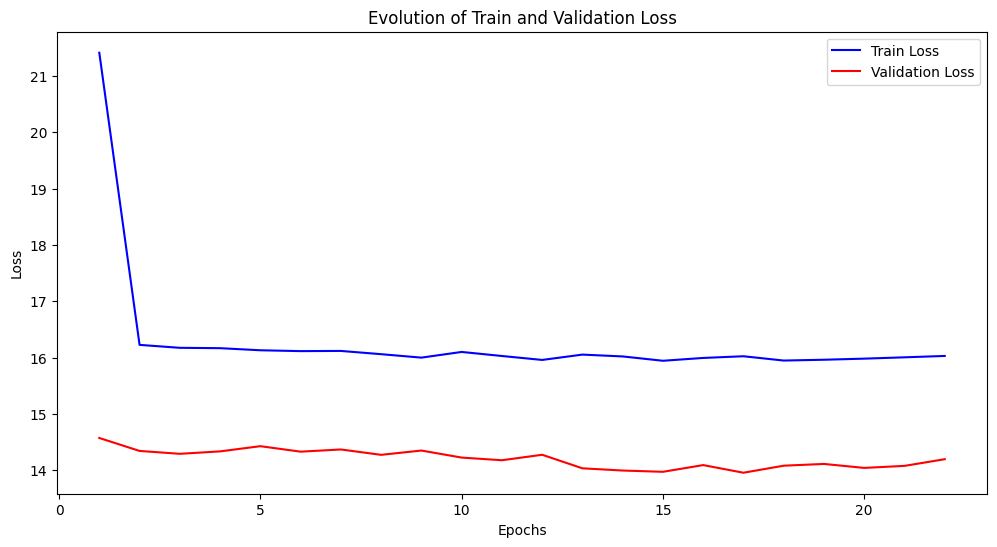

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# List of epochs
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Evolution of Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
result = model.evaluate(X_test_sc, y_test)
print(result)

4063/4063 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 14.5166 - mae: 2.1424
[14.275099754333496, 2.1330013275146484]


In [ ]:
y_pred = model.predict(X_test_sc)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae_2 = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae_2}")

4063/4063 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Mean Squared Error: 14.275103493439401
Mean Absolute Error: 2.1330016298072514


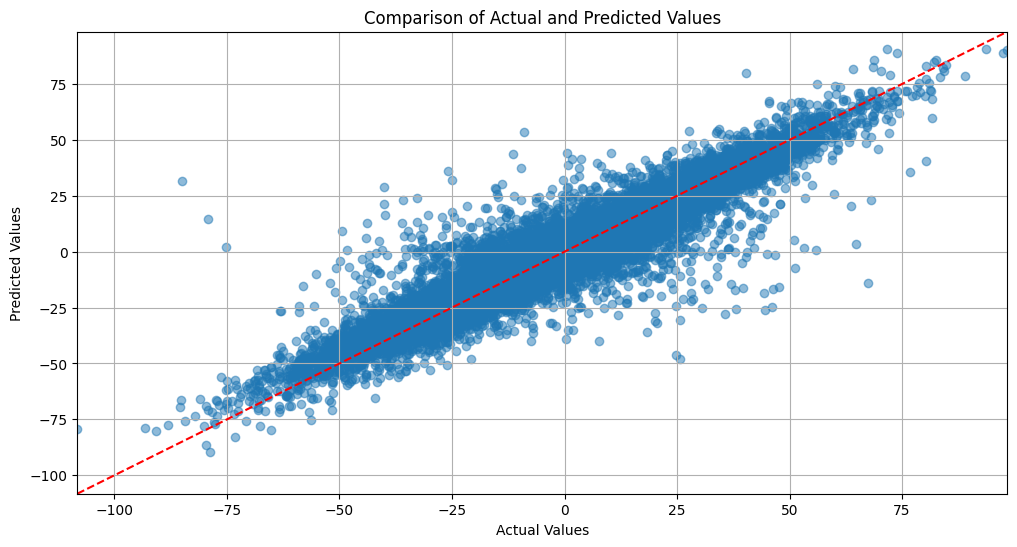

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()

In [ ]:
import tensorflow_model_optimization as tfmot

In [ ]:
def nn_model_pruned(n_layers=1, n_neurons=32, optimizer='adam'):
    pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.0, final_sparsity=0.5,
        begin_step=2000, end_step=6000
    )

    model = Sequential()

    # Camada de entrada + primeira camada oculta com pruning
    model.add(
        tfmot.sparsity.keras.prune_low_magnitude(
            Dense(n_neurons, input_dim=X_train_sc.shape[1], activation='relu'),
            pruning_schedule=pruning_schedule
        )
    )
    model.add(Dropout(0.2))  # Dropout de 20%

    # Camadas ocultas adicionais com pruning
    for _ in range(n_layers - 1):
        model.add(
            tfmot.sparsity.keras.prune_low_magnitude(
                Dense(n_neurons, activation='relu'),
                pruning_schedule=pruning_schedule
            )
        )
        model.add(Dropout(0.2))

    # Camada de saída com pruning
    model.add(
        tfmot.sparsity.keras.prune_low_magnitude(
            Dense(1),
            pruning_schedule=pruning_schedule
        )
    )

    # Compilação do modelo
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model



In [ ]:
# Definir o modelo e configurar callbacks
model = nn_model_pruned(n_layers=1, n_neurons=32, optimizer=Adam())
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Treinar o modelo com pruning
history = model.fit(
    X_train_sc, y_train, epochs=30, batch_size=32, validation_data=(X_val_sc, y_val),
    callbacks=[early_stopping, tfmot.sparsity.keras.UpdatePruningStep()]
)

ValueError: `prune_low_magnitude` can only prune an object of the following types: keras.models.Sequential, keras functional model, keras.layers.Layer, list of keras.layers.Layer. You passed an object of type: Dense.

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss / MAE')
plt.legend()
plt.show()

In [ ]:
model = tfmot.sparsity.keras.strip_pruning(model)

# Evaluation of the application of different models

It is evaluated:

*   number of layers
*   number of neurons in each layer
*   optimizer

In [ ]:
hidden_layers_options = [1, 2, 3]
neurons_options = [32, 64]
optimizers_options = ['adam', 'sgd']

# Iterar sobre diferentes combinações de parâmetros
results = []
histories = []
models = []

In [ ]:
def create_optimizer(optimizer_name):
    if optimizer_name == 'adam':
        return Adam()
    elif optimizer_name == 'sgd':
        return SGD(learning_rate=0.001)

In [ ]:
for n_hidden in hidden_layers_options:
    for n_neurons in neurons_options:
        for optimizer_name in optimizers_options:

            optimizer = create_optimizer(optimizer_name)

            print(f'Testing {n_hidden} hidden layers, {n_neurons} neurons, optimizer {optimizer.__class__.__name__}')

            # Construir o modelo com as configurações atuais
            model = nn_model(n_layers=n_hidden, n_neurons=n_neurons, optimizer=optimizer)

            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Treinar o modelo
            history= model.fit(X_train_sc, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

            # Avaliar o modelo
            test_loss, test_mae  = model.evaluate(X_test_sc, y_test, verbose=0)

            # Salvar os resultados
            results.append({
                'hidden_layers': n_hidden,
                'neurons': n_neurons,
                'optimizer': optimizer.__class__.__name__,
                'test loss': test_loss,
                'test mae': test_mae
            })

            histories.append({
                'hidden_layers': n_hidden,
                'neurons': n_neurons,
                'optimizer': optimizer.__class__.__name__,
                'train_loss_history': history.history['loss'],
                'train_mae_history': history.history.get('mae', None),
                'val_loss_history': history.history.get('val_loss', None),
                'val_mae_history': history.history.get('val_mae', None)
            })

            models.append({
                'hidden_layers': n_hidden,
                'neurons': n_neurons,
                'optimizer': optimizer.__class__.__name__,
                'model': model
            })


Testing 1 hidden layers, 32 neurons, optimizer Adam
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13000/13000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 30.4978 - mae: 3.1577 - val_loss: 14.3054 - val_mae: 2.2043
Epoch 2/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 16.2871 - mae: 2.3227 - val_loss: 14.4484 - val_mae: 2.2056
Epoch 3/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 15.9550 - mae: 2.2973 - val_loss: 14.0475 - val_mae: 2.1536
Epoch 4/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 16.3141 - mae: 2.3146 - val_loss: 14.2721 - val_mae: 2.1772
Epoch 5/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 16.4193 - mae: 2.3106 - val_loss: 14.0632 - val_mae: 2.1534
Epoch 6/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 16.0235 - mae: 2.2963 - val_loss: 13.9863 - val_mae: 2.1467
Epoch 7/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 16.2618 - mae: 2.3045 - val_loss: 13.9543 - val_mae: 2.1450
Epoch 8/30
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 16.1769 - mae: 2.3015 - val_loss: 14.0990 - val_mae: 2.1567
Epoch 9/30


In [ ]:
results_df = pd.DataFrame(results)

# Exibir o DataFrame final
print(results_df)

    hidden_layers  neurons optimizer  test loss  test mae
0               1       32      Adam  14.138131  2.116839
1               1       32       SGD  14.206335  2.134765
2               1       64      Adam  13.661639  2.077032
3               1       64       SGD  13.793233  2.093985
4               2       32      Adam  12.170370  2.045511
5               2       32       SGD  11.886198  2.012545
6               2       64      Adam   9.761168  1.925634
7               2       64       SGD   9.899602  1.898077
8               3       32      Adam  11.849740  2.052763
9               3       32       SGD  16.822668  2.377447
10              3       64      Adam   9.970226  1.927569
11              3       64       SGD  10.965309  1.992767


In [ ]:
histories_df = pd.DataFrame(histories)

# Exibir o DataFrame final
print(histories_df)

    hidden_layers  neurons optimizer  \
0               1       32      Adam   
1               1       32       SGD   
2               1       64      Adam   
3               1       64       SGD   
4               2       32      Adam   
5               2       32       SGD   
6               2       64      Adam   
7               2       64       SGD   
8               3       32      Adam   
9               3       32       SGD   
10              3       64      Adam   
11              3       64       SGD   

                                   train_loss_history  \
0   [20.516660690307617, 16.23922348022461, 16.209...   
1   [18.62647247314453, 16.59659767150879, 16.3621...   
2   [18.754867553710938, 15.257750511169434, 15.14...   
3   [17.33814811706543, 15.360926628112793, 15.164...   
4   [21.200746536254883, 18.022228240966797, 17.67...   
5   [20.59088134765625, 18.153034210205078, 17.737...   
6   [18.279949188232422, 15.685428619384766, 14.72...   
7   [18.25364875793457,

In [ ]:
models_df = pd.DataFrame(models)

# Exibir o DataFrame final
print(models_df)

    hidden_layers  neurons optimizer  \
0               1       32      Adam   
1               1       32       SGD   
2               1       64      Adam   
3               1       64       SGD   
4               2       32      Adam   
5               2       32       SGD   
6               2       64      Adam   
7               2       64       SGD   
8               3       32      Adam   
9               3       32       SGD   
10              3       64      Adam   
11              3       64       SGD   

                                          model  
0      <Sequential name=sequential, built=True>  
1    <Sequential name=sequential_1, built=True>  
2    <Sequential name=sequential_2, built=True>  
3    <Sequential name=sequential_3, built=True>  
4    <Sequential name=sequential_4, built=True>  
5    <Sequential name=sequential_5, built=True>  
6    <Sequential name=sequential_6, built=True>  
7    <Sequential name=sequential_7, built=True>  
8    <Sequential name=sequent

# Study with the combination that provided the best results


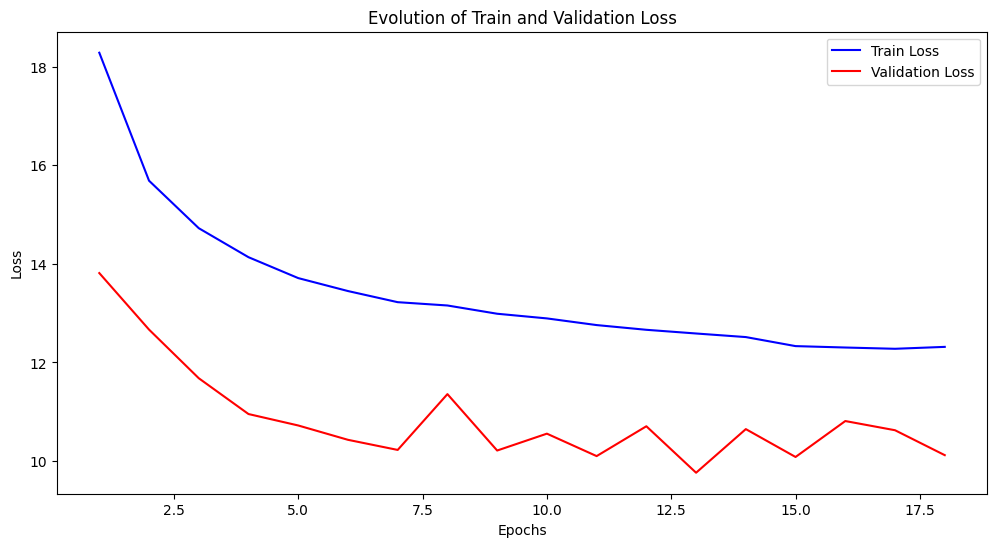

In [ ]:
best_history = histories_df.iloc[6]

train_loss = best_history['train_loss_history']
val_loss = best_history['val_loss_history']

# List of epochs
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Evolution of Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
best_model= models_df.iloc[6]['model']
y_pred =best_model.predict(X_test_sc)

4063/4063 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


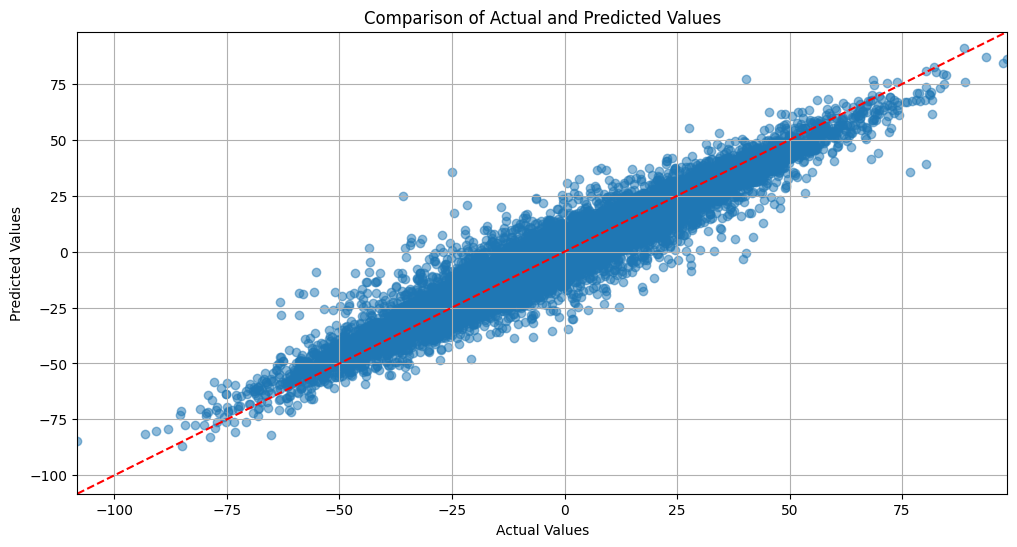

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()